In [41]:
import json
import matplotlib.pyplot as plt
import pandas as pd

In [42]:
with open(r"C:\Users\hi020\Desktop\play\sample_train1\annotations.json") as f:
    data = json.load(f)

In [43]:
num = 405

In [44]:
img_lo = r"C:\Users\hi020\Desktop\play\sample_train1\png\{}.png".format(num)

In [45]:
bbox_list = []

def yxwh(x, bbox_list):
    if x:
        if type(x) == list:
            for _x in x:
                if type(_x) == dict:
                    a = _x.keys()
                    for i in a:
                        if i == 'bboxes':
                            bbox_list += _x[i]
                        elif i == 'bbox':
                            bbox_list.append(_x[i])
                        else:
                            yxwh(_x[i], bbox_list)
        elif type(x) == dict:
            a = x.keys()
            for i in a:
                if i == 'bboxes':
                    bbox_list += x[i]
                elif i == 'bbox':
                    if list(x[i].keys()) == ['bbox']:
                        bbox_list.append(x[i]['bbox'])
                    else:
                        bbox_list.append(x[i])
                else:
                    yxwh(x[i], bbox_list)
                    
yxwh(data[num]['models'][0], bbox_list)

In [46]:
points = []

y_val = data[num]['models'][0]['y']

for i in bbox_list:
    
    y = i['y']
    x = i['x']
    w = i['w']
    h = i['h']
    
    point1 = (x,y)
    point2 = (x+w, y+h)
    
    is_up = y_val[1] > y_val[0]
    
    if is_up:
        point3 = (x, y+h)
        
    else :
        point3 = (x, y)

    y_val = y_val[1:]
    
    points.append((point1, point2, point3))
    print(point3)

if is_up:
    point3 = (x+w, y)
    points.append((point1, point2, point3))
else:
    point3 = (x+w, y+h)
    points.append((point1, point2, point3))


(66, 336)
(103, 312)
(140, 289)
(177, 265)
(214, 241)
(251, 218)
(288, 194)
(325, 171)
(362, 147)


In [47]:
len(point3)

2

In [48]:
points

[((66, 312), (103, 336), (66, 336)),
 ((103, 289), (140, 312), (103, 312)),
 ((140, 265), (177, 289), (140, 289)),
 ((177, 241), (214, 265), (177, 265)),
 ((214, 218), (251, 241), (214, 241)),
 ((251, 194), (288, 218), (251, 218)),
 ((288, 171), (325, 194), (288, 194)),
 ((325, 147), (362, 171), (325, 171)),
 ((362, 123), (399, 147), (362, 147)),
 ((362, 123), (399, 147), (399, 123))]

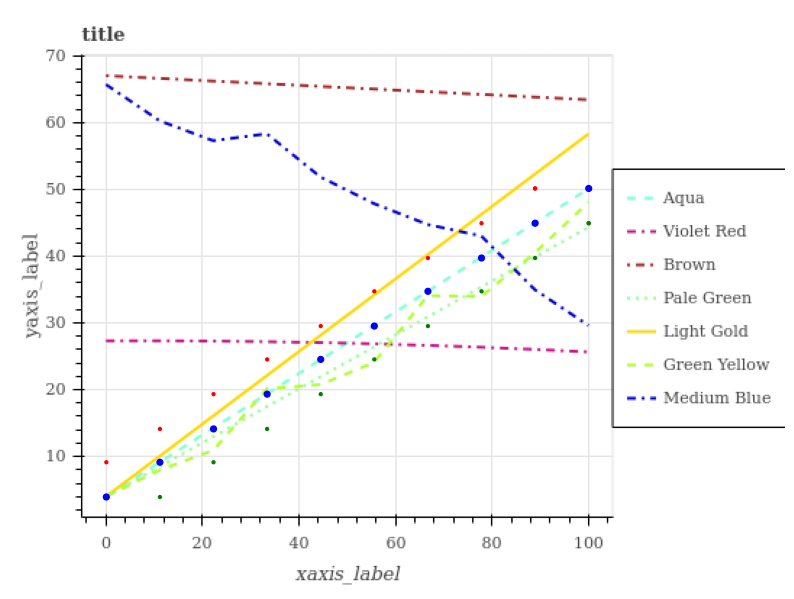

In [49]:
from matplotlib.patches import Circle

patches = []

for p1,p2,p3 in points:
    patches.append(Circle(p1, radius=1, color='red'))
    patches.append(Circle(p2, radius=1, color='green'))
    patches.append(Circle(p3, radius=2, color='blue'))

fig, ax = plt.subplots(1, figsize=(10,10))
ax.set_axis_off()
for p in patches:
    ax.add_patch(p)


ax.imshow(plt.imread(img_lo))



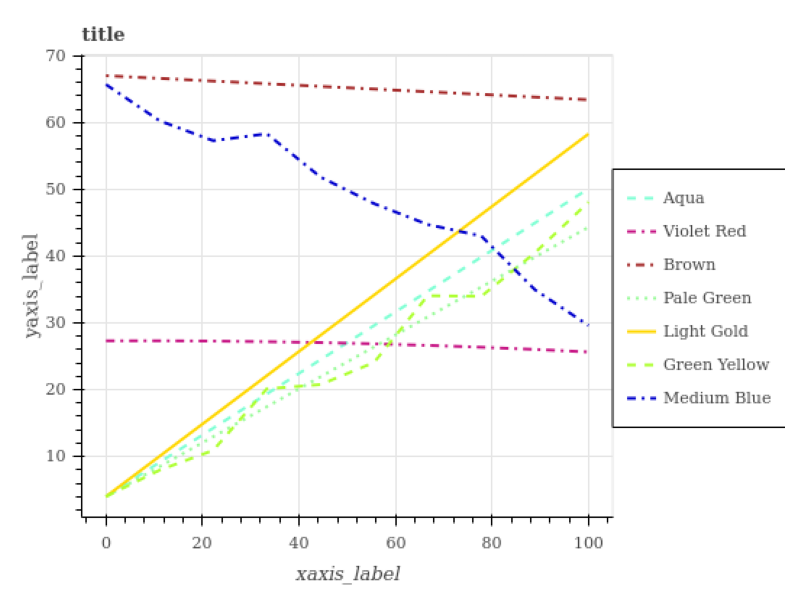

In [50]:
plt.figure(figsize=(10,10))
plt.gca().set_axis_off()

plt.imshow(plt.imread(img_lo))